<font size = "5"> **[Image Tools](2_Image_Tools.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />


# Adaptive Fourier Filtering


part of 

<font size = "4"> **pyTEMlib**, a **pycroscopy** library </font>


Notebook by 

Gerd Duscher

Materials Science & Engineering<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville


An introduction into Fourier Filtering of images.


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](_.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [32]:
import sys
from IPython.lib.deepreload import reload as dreload

try:
    import sidpy 
except ModuleNotFoundError:
    !pip3 install sidpy
if sidpy.__version__ < '0.0.3':
    !{sys.executable} -m pip install  --upgrade sidpy
    dreload(sidpy)
try:
    import pyNSID 
except ModuleNotFoundError:
    !{sys.executable} -m pip install  --upgrade pyNSID
try:
    import pyTEMlib
except ModuleNotFoundError:
    !{sys.executable} -m pip install  --upgrade pyTEMlib
if pyTEMlib.__version__ < '0.2020.10.3':
    !{sys.executable} -m pip install  --upgrade pyTEMlib
    dreload(pyTEMlib)   
from IPython.lib.deepreload import reload as dreload

import sys
!{sys.executable} -m pip install  --upgrade ""../dist/pyTEMlib-0.2020.10.3-py3-none-any.whl"
dreload(pyTEMlib) 

sidpy version:  0.0.3


## Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets. 



In [2]:
%pylab --no-import-all notebook
%gui qt

import pyTEMlib
import pyTEMlib.file_tools as ft
import pyTEMlib.image_tools as it
print('pyTEMlib version: ', pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
pyTEMlib version:  0.2020.10.3


## Open File

These datasets are stored in the pyNSID data format (extension: hf5) automatically. 

All results can be stored in that file. 

<HDF5 group "/Measurement_000/Channel_000" (0 members)> 05_SI Survey Image


<IPython.core.display.Javascript object>


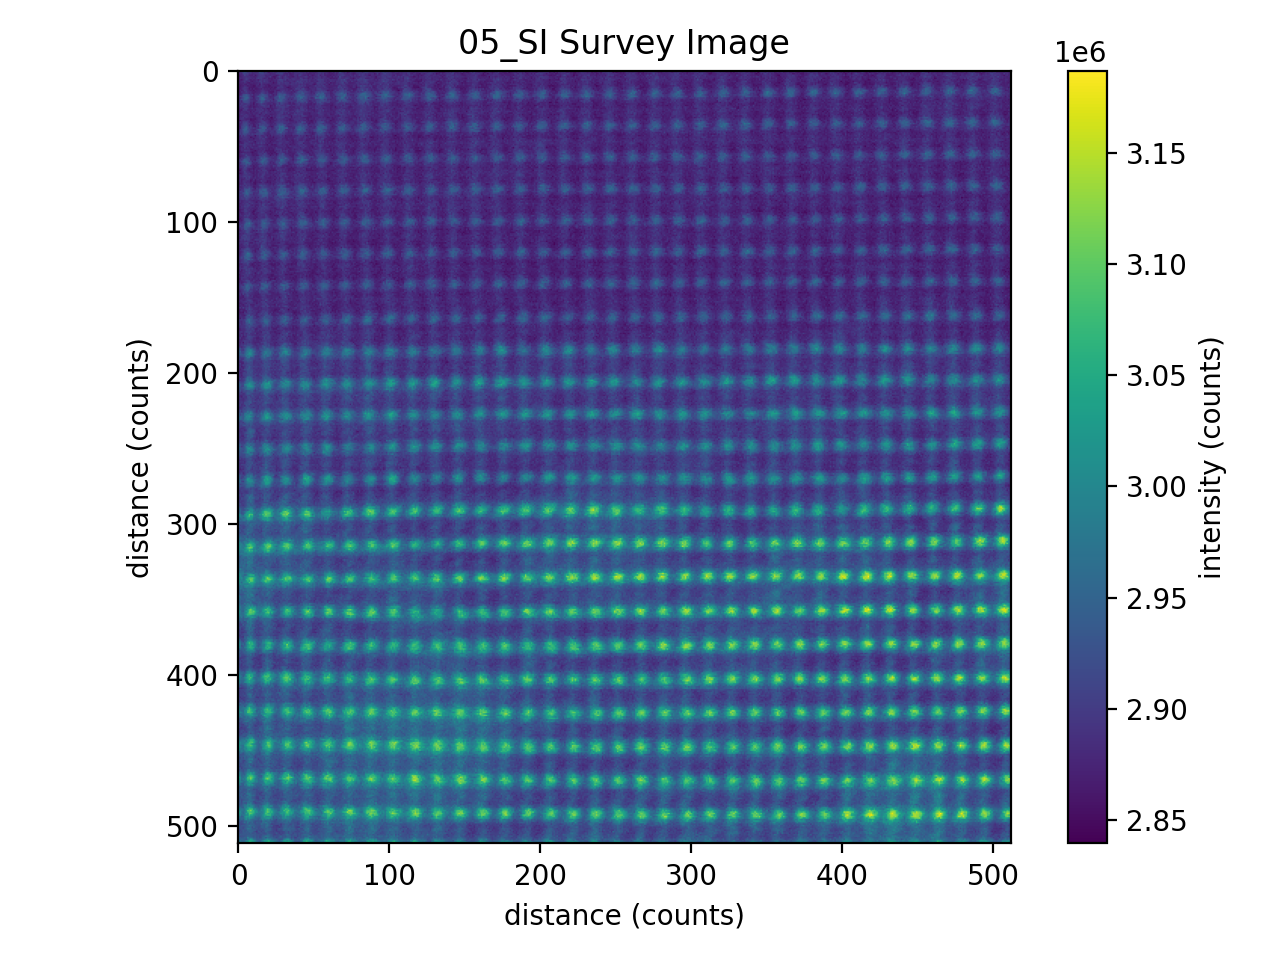

In [7]:
try:
    dataset.h5_dataset.file.close()
except:
    pass
dataset= ft.open_file()
if dataset.data_type.name != 'IMAGE':
    print('We really would need an image here')
dataset.plot()

In [8]:
choose_image = ft.ChooseDataset(dataset.h5_dataset.parent)

C:\Users\gduscher\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Dropdown(description='Select image:', options=('Channel_000/05_SI Survey Image',), value='Channel_000/05_SI Su…

In [9]:
choose_image.dataset

sidpy.Dataset of type IMAGE with:
 dask.array<generic, shape=(512, 512), dtype=uint32, chunksize=(512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
  x:  distance (counts) of size (512,)
  y:  distance (counts) of size (512,)
 with metadata: ['DIMENSION_LABELS', 'DIMENSION_LIST', 'data_type', 'main_data_name', 'modality', 'nsid_version', 'quantity', 'source', 'units']

## Fourier Transform of Image

Shape of dataset is:  (512, 512)
2D dataset


<IPython.core.display.Javascript object>


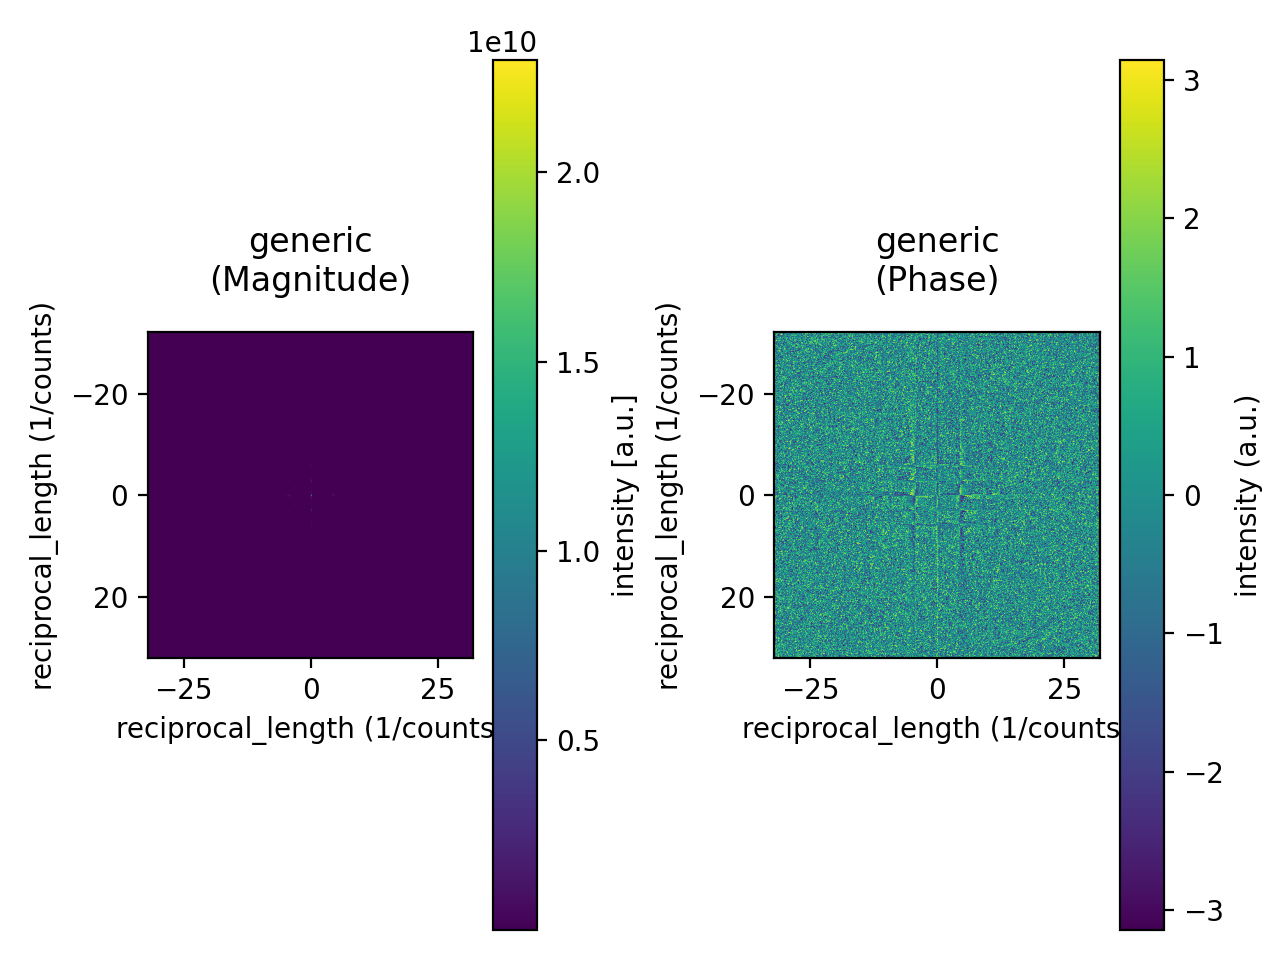

In [38]:
fft_dataset = it.fourier_transform(choose_image.dataset)
fft_dataset.view_metadata()
kwargs = {'figsize':(10,5)}
fft_dataset.plot(kwargs)

## Power Spectrum of Image

smoothing : 1
source:  /Measurement_000/Channel_000/05_SI Survey Image


<IPython.core.display.Javascript object>


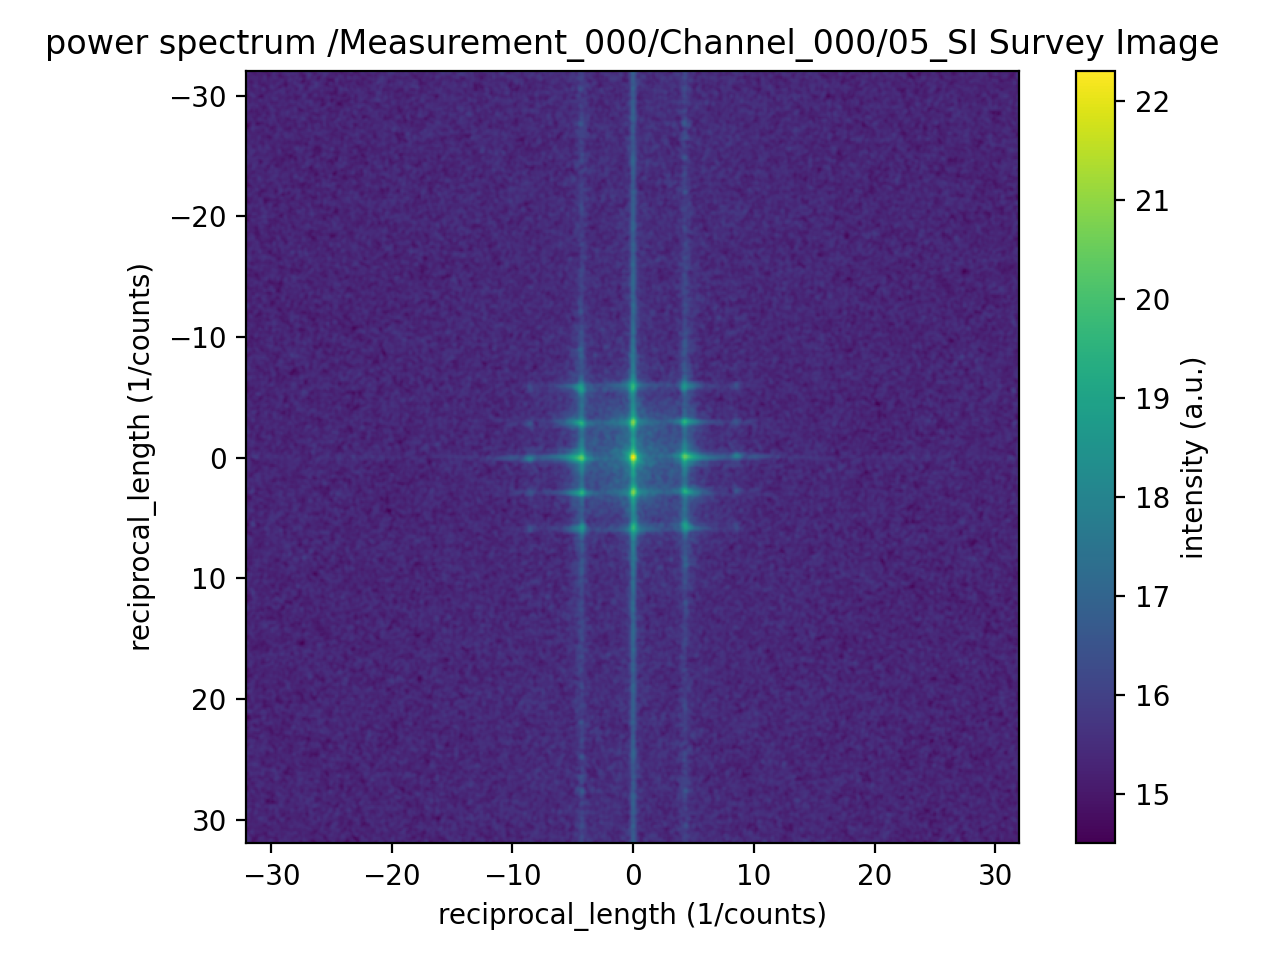

In [18]:
power_spectrum = it.power_spectrum(choose_image.dataset, smoothing=1)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
power_spectrum.plot()

## Spot Detection in Fourier Transform

Found 19 reflections


<IPython.core.display.Javascript object>


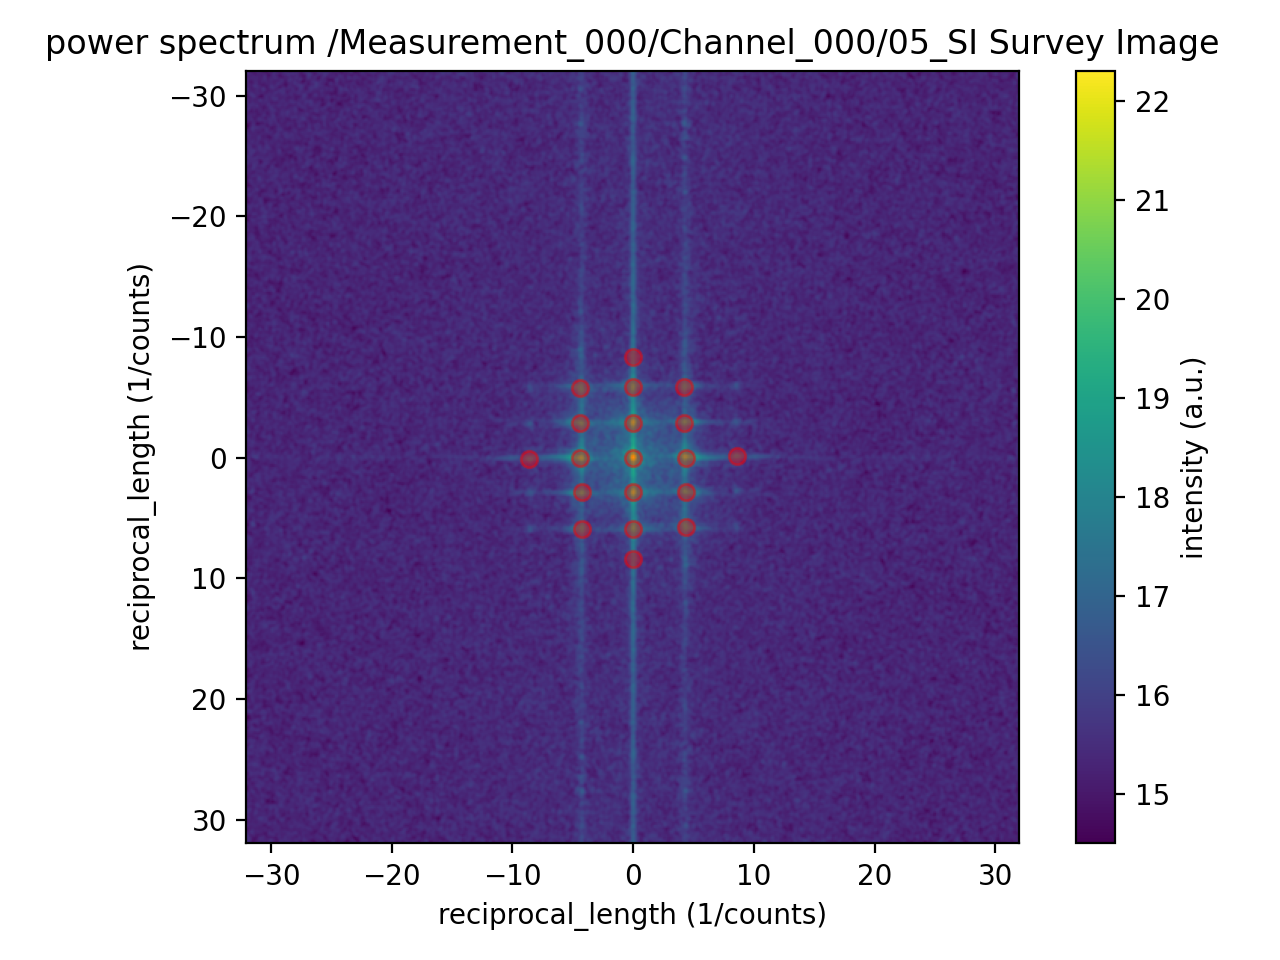

In [29]:
spots = it.diffractogram_spots(power_spectrum, spot_threshold=0.09)
power_spectrum.plot()
plt.gca().scatter(spots[:,1],spots[:,0], color='red', alpha=0.4);

## Adaptive Fourier Filter

<IPython.core.display.Javascript object>


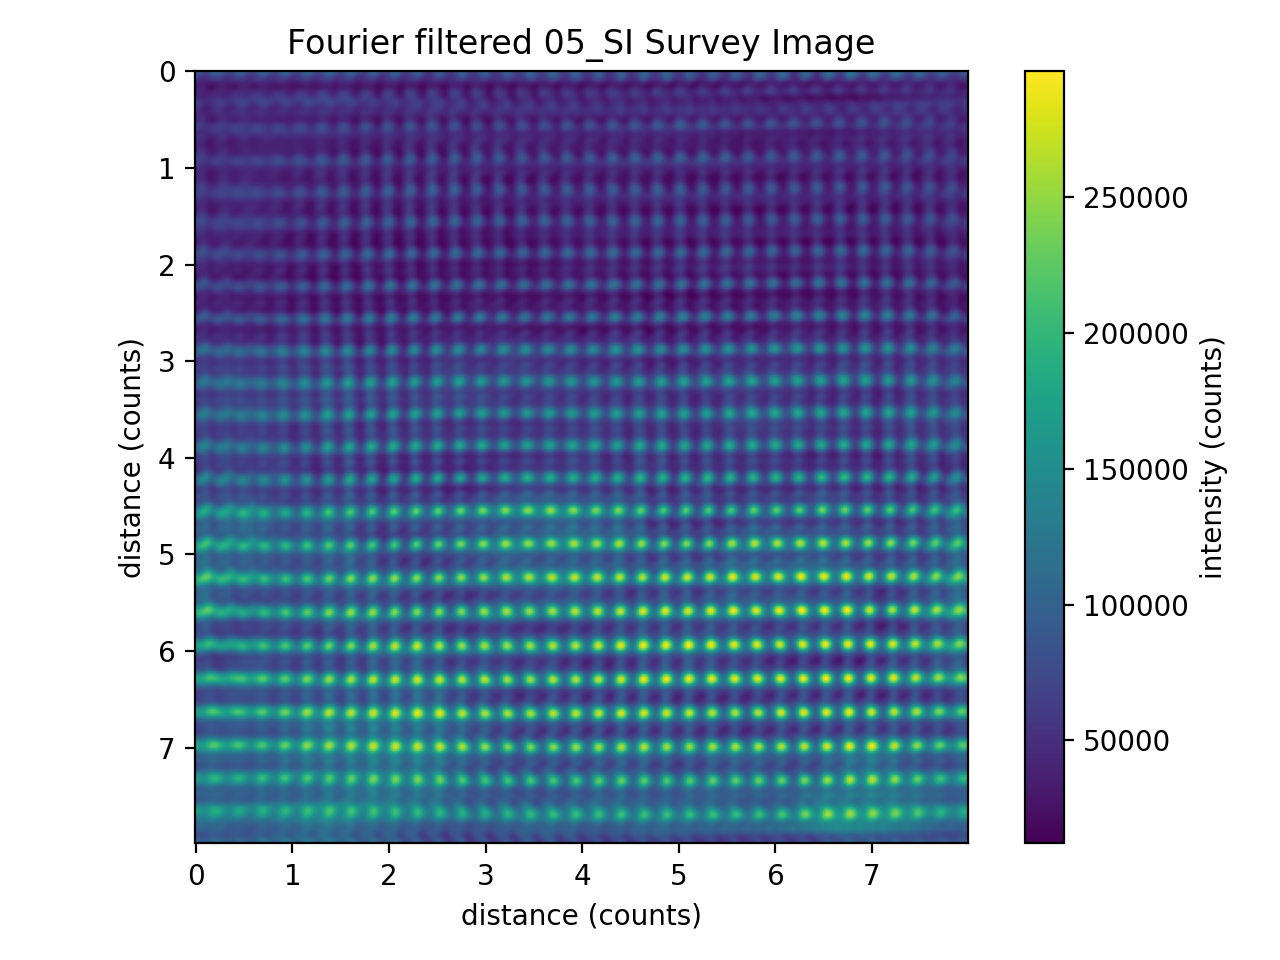

In [34]:
filtered_dataset = it.adaptive_fourier_filter(choose_image.dataset, spots, low_pass=2., reflection_radius=.3)
filtered_dataset.plot()

Let's see what we did - In Fourier space, of course.

smoothing : 1
source:  /Measurement_000/Channel_000/05_SI Survey Image


<IPython.core.display.Javascript object>


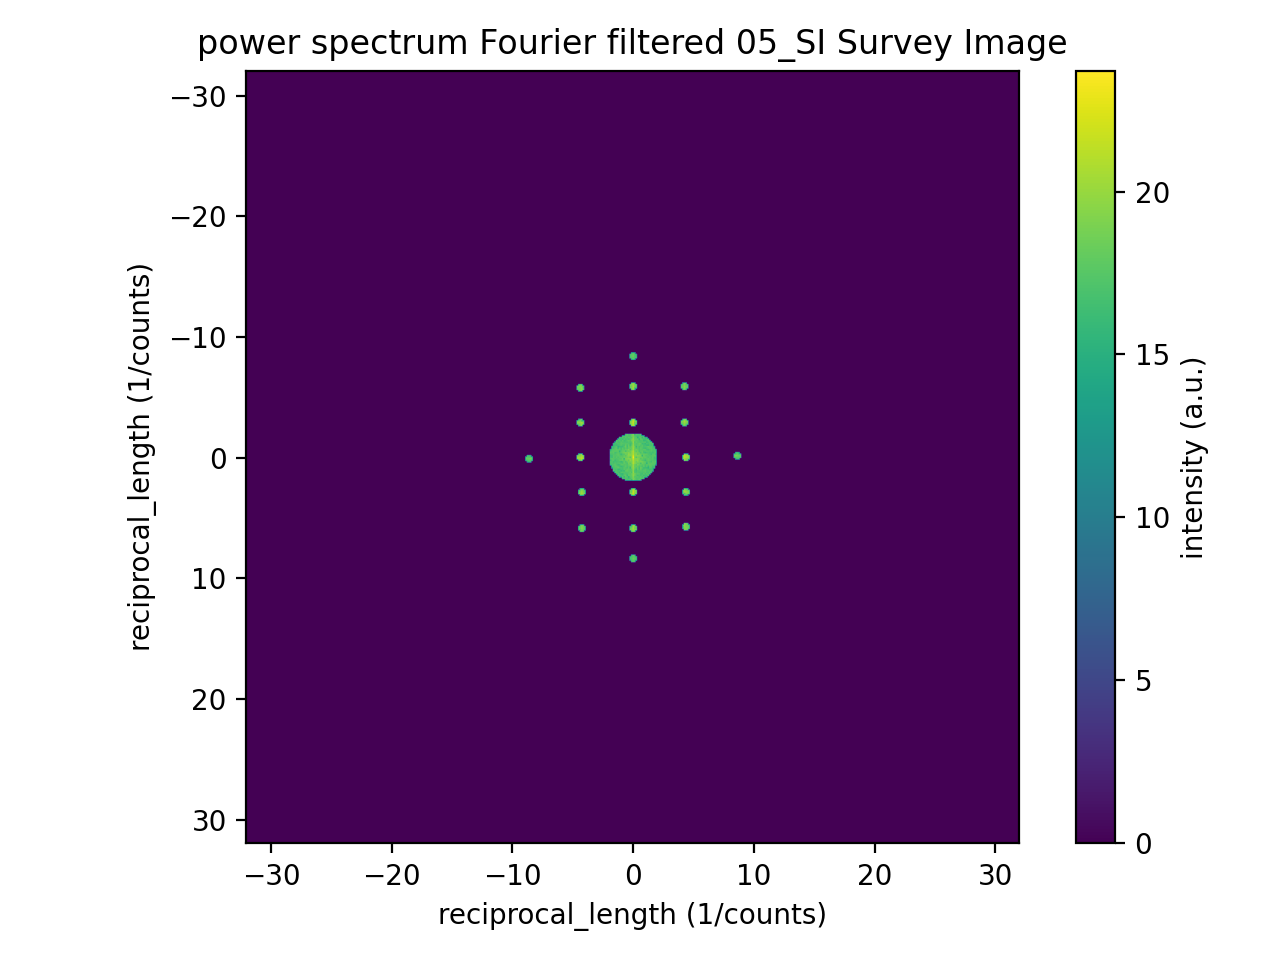

In [35]:
filtered_power_spectrum = it.power_spectrum(filtered_dataset, smoothing=0)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
filtered_power_spectrum.plot()

Please note that the spots are ordered from center to outside.

The third parameter of a spot is its angle.

In [48]:
print(spots[:5])

[[ 0.          0.          0.        ]
 [-1.8125      1.5        -0.8794594 ]
 [ 1.8125     -1.5         2.26213326]
 [ 1.5         2.          0.64350111]
 [-1.5        -2.         -2.49809154]]


## Log the result

In [39]:
results_channel = ft.log_results(dataset.h5_dataset.parent, filtered_dataset)

<HDF5 group "/Measurement_000/Channel_000/Log_000" (0 members)> Fourier filtered 05_SI Survey Image


A tree-like plot of the file

In [40]:
ft.h5_tree(dataset.h5_dataset.file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ 05_SI Survey Image
    ├ Log_000
      -------
      ├ Fourier filtered 05_SI Survey Image
      ├ metadata
        --------
      ├ original_metadata
        -----------------
      ├ x
      ├ y
    ├ metadata
      --------
    ├ original_metadata
      -----------------
    ├ x
    ├ y


A convenient function to select a dataset (for further processing, visualization or whatever)

In [41]:
choose_image = ft.ChooseDataset(dataset.h5_dataset.parent)

C:\Users\gduscher\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Dropdown(description='Select image:', options=('Log_000/Fourier filtered 05_SI Survey Image', 'Channel_000/05_…

The selected dataset can then easily be plotted

<IPython.core.display.Javascript object>


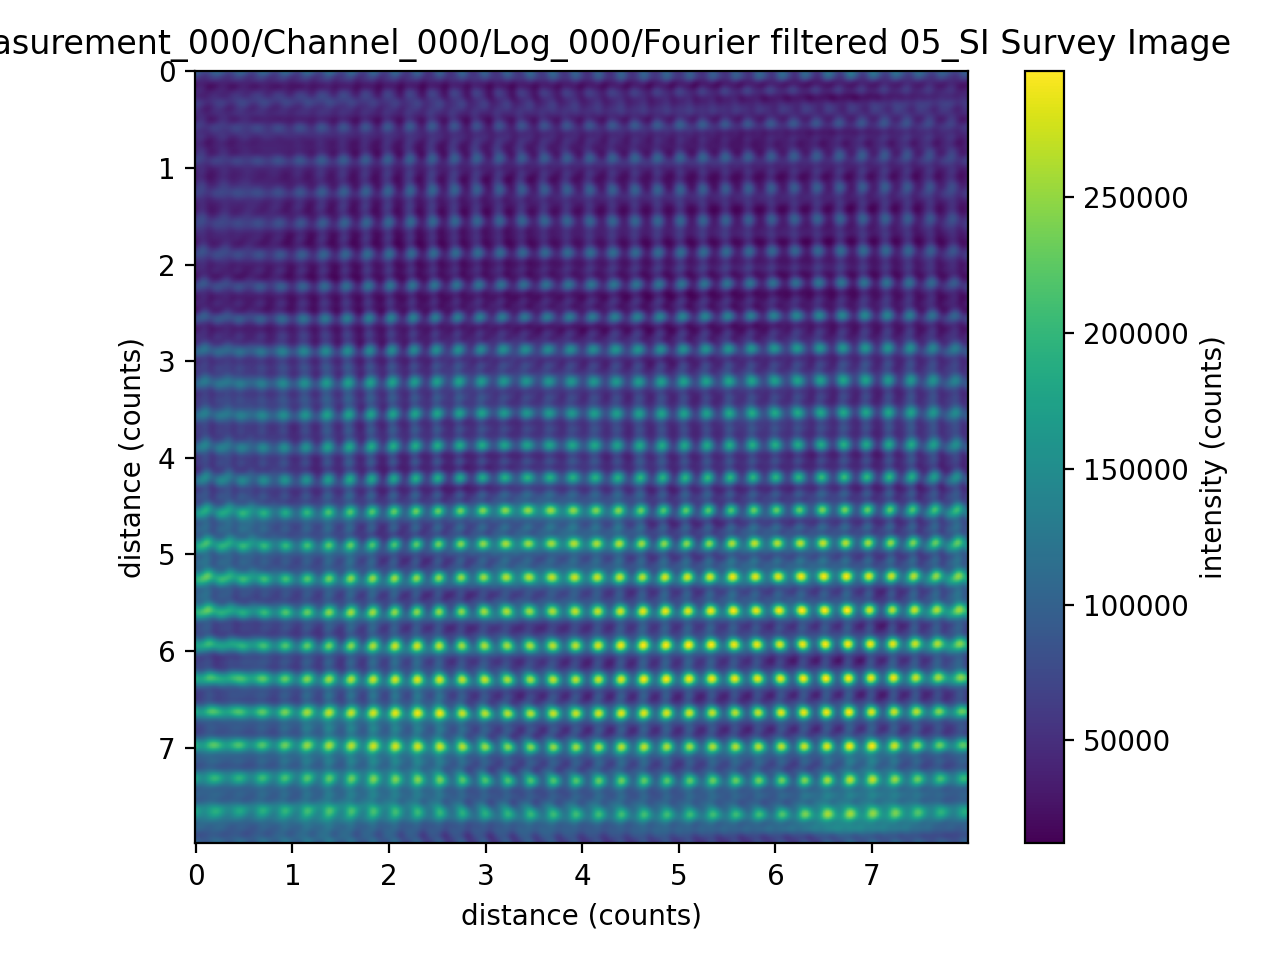

In [43]:
choose_image.dataset.plot()

## Close File
let's close the file but keep the filename

In [44]:
filename = results_channel.file.filename
results_channel.file.close()

## Simulate new notebook
We can now simulate a new notebook and open the file again.



In [45]:
new_dataset= ft.open_file(filename)
choose_image = ft.ChooseDataset(new_dataset.h5_dataset.parent)

C:\Users\gduscher\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Dropdown(description='Select image:', options=('Log_000/Fourier filtered 05_SI Survey Image',), value='Log_000…

<IPython.core.display.Javascript object>


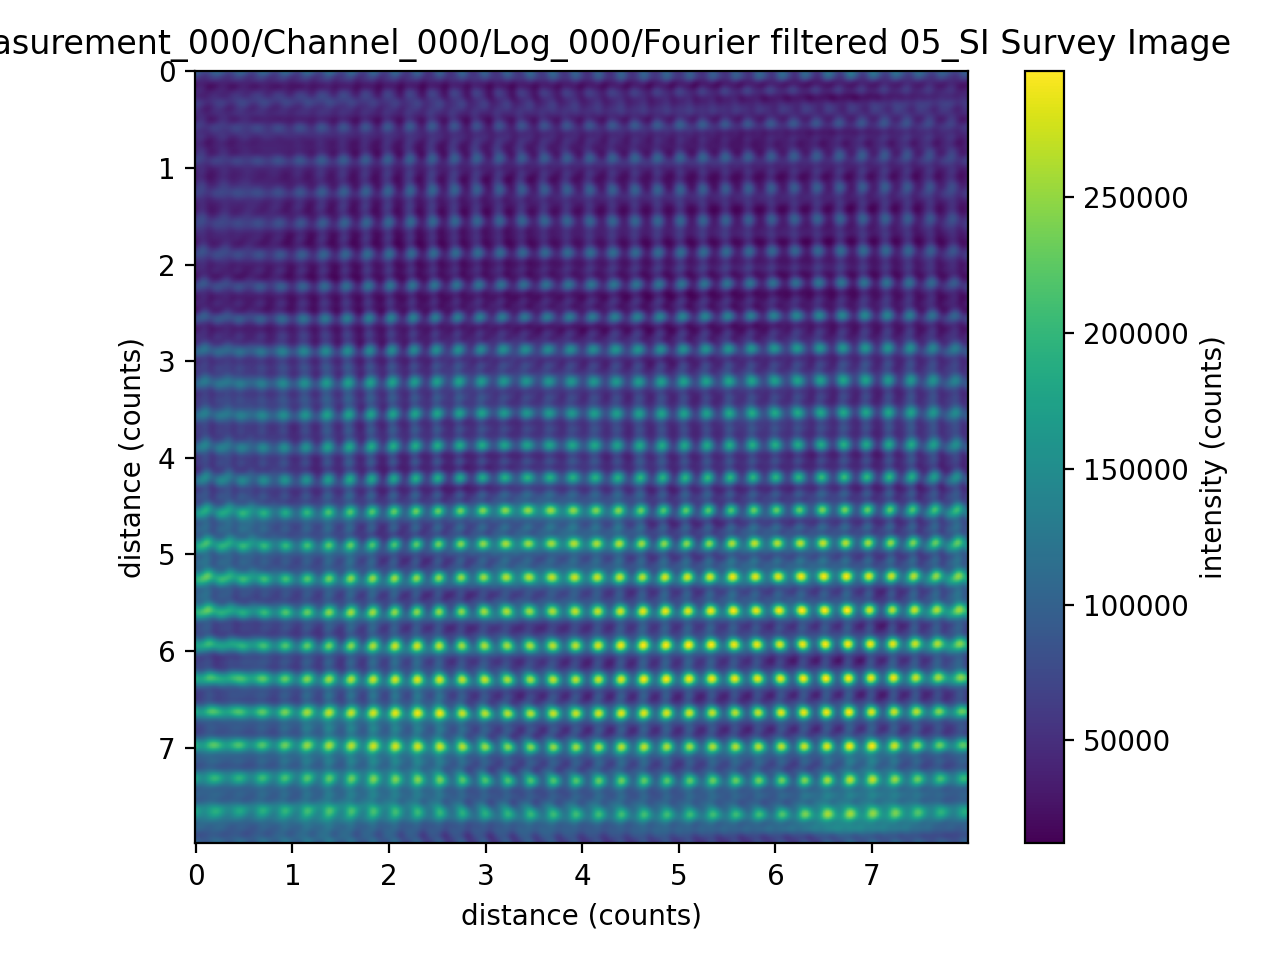

In [46]:
choose_image.dataset.plot()

We want to make an image operation of the images in the file.

In [54]:
choose_image = ft.ChooseDataset(new_dataset.h5_dataset.parent.parent)
print('       subtract')
choose_image2 = ft.ChooseDataset(new_dataset.h5_dataset.parent)

Dropdown(description='Select image:', options=('Log_000/Fourier filtered 05_SI Survey Image', 'Channel_000/05_…

       subtract


Dropdown(description='Select image:', options=('Log_000/Fourier filtered 05_SI Survey Image',), value='Log_000…

<IPython.core.display.Javascript object>


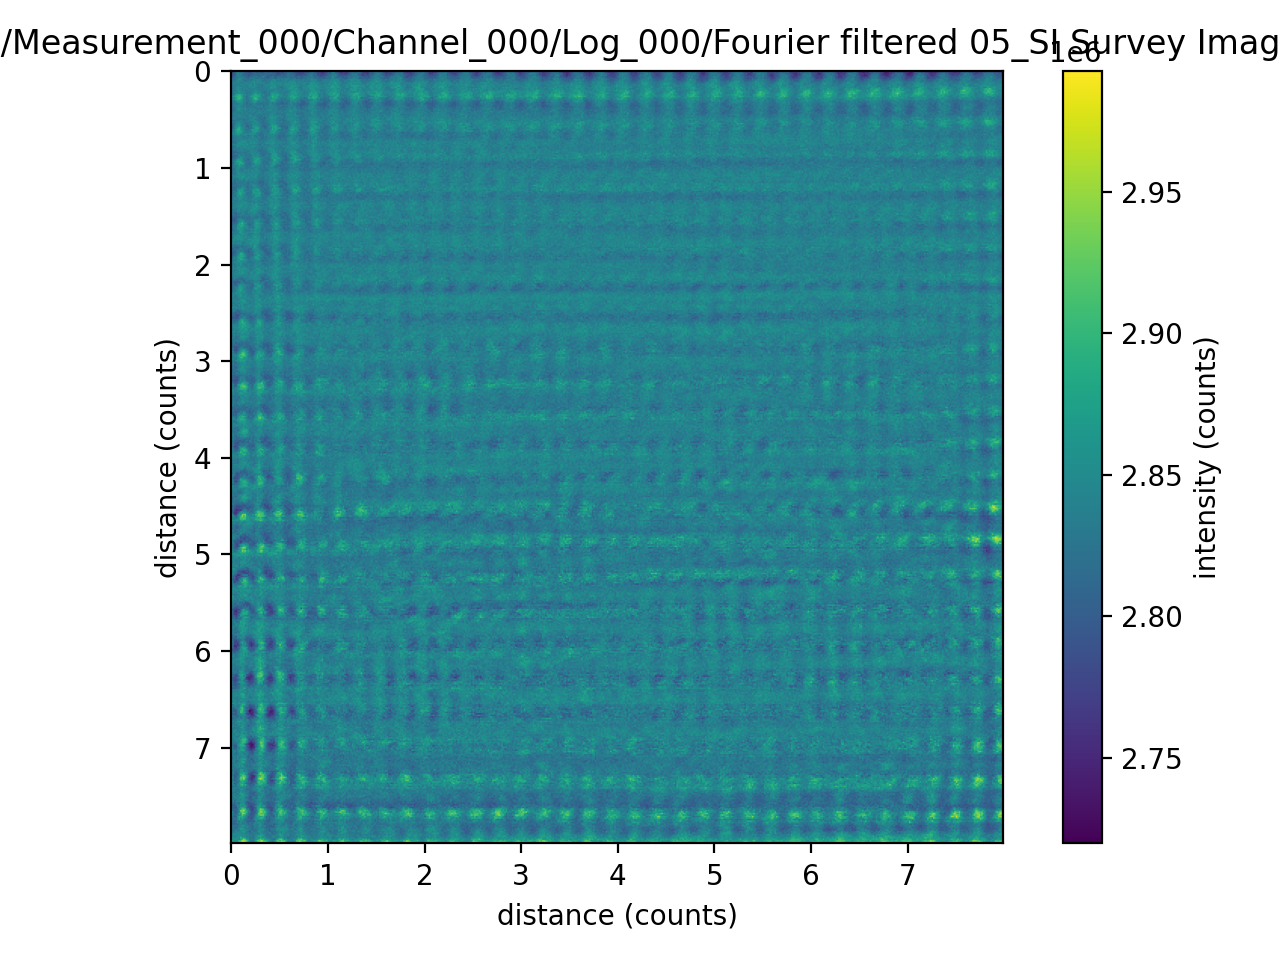

In [55]:
new_image = np.array(choose_image.dataset) - np.array(choose_image2.dataset)
new_image = new_dataset.like_data(new_image)
new_image.plot()

## Close File for Good

In [56]:
new_dataset.h5_dataset.file.close()